1. Dada la siguiente implementación de los métodos de descenso por gradiente, método de Newton y método de Quasi-Newton, experimenta con diferentes funciones. Funciones sugeridas:

a) $f(x)=(x-2)^2+1$

b) $f(x)=(x-2)^2+(y-2)^2+1$

c) $f(x)=\frac{x^2}{20}+2y^2$

d) $f(x)=\frac{e^x+e^{-x}}2$

e) $f(x)=\frac{e^x+e^{-x}+e^y+e^{-y}}{10}$

In [4]:
import numpy as np

# Función objetivo: f(x) = (x-2)^2 + 1
def f(x):
    return np.arctan(x[0]**2 + x[1]**2) / np.exp(x[0]) 

# Gradiente:
def grad_f(x):
    df_dx = ((2*x[0] / (1 + (x[0]**2 + x[1]**2)**2)) - np.arctan(x[0]**2 + x[1]**2)) / np.exp(x[0])
    df_dy = 2 * x[1] / ((1 + (x[0]**2 + x[1]**2)**2) * np.exp(x[0]))
    return np.array([df_dx, df_dy])

#HyperParameters
learning_rate = 0.5
tol = 1e-6
max_iter = 100
x0 = [3,1]

C:\Users\aixab\AppData\Local\Temp\ipykernel_6184\779382627.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r') # coolwarm va de azul a rojo, _r lo invierte (rojo a azul)


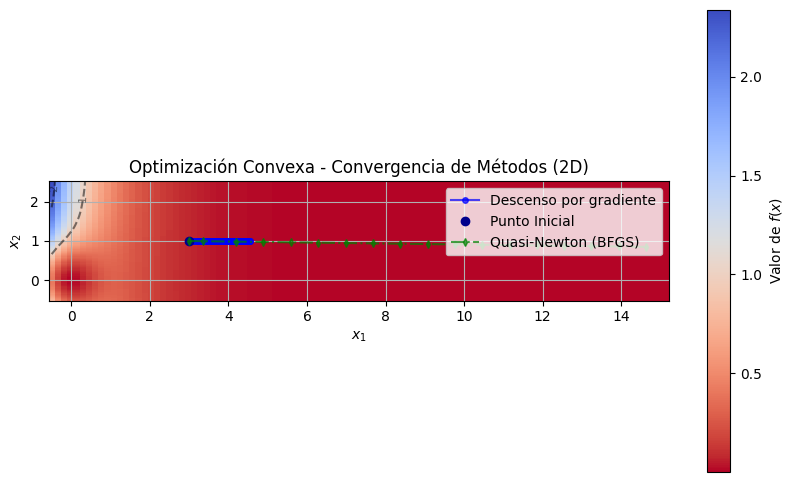

Valores Alcanzados
Descenso por gradiente: [4.54938481 0.98962408]
Quasi-Newton: [14.62506194  0.85199009]

Resultados en tiempos
Descenso por gradiente: 0.006050586700439453
Quasi-Newton: 0.007466316223144531

Número de pasos
Descenso por gradiente: 101
Quasi-Newton: 18


In [6]:
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize


# Descenso por gradiente manual
def gradient_descent(x0, grad_f, learning_rate=0.1, tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, history

# Método de Newton manual
def newton_method(x0, grad_f, hess_f, learning_rate=0.1, tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        hess_inv = np.linalg.inv(hess)
        x_new = x - learning_rate*(hess_inv @ grad)
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, history

# Quasi-Newton usando scipy.optimize.minimize con BFGS y callback para historial
class Callback:
    def __init__(self):
        self.history = []
    def __call__(self, xk):
        self.history.append(np.array(xk))

callback = Callback()

# Ejecutar y medir tiempos de los métodos
start = time.time()
res = minimize(f, x0, method='BFGS', jac=grad_f, callback=callback, options={'gtol':1e-6, 'disp': False, 'maxiter': 100})
time_qn = time.time() - start
x_qn = res.x
hist_qn = [np.array(x0)] + callback.history

start = time.time()
x_gd, hist_gd = gradient_descent(x0, grad_f, learning_rate,tol, max_iter)
time_gd = time.time() - start

# start = time.time()
# x_nm, hist_nm = newton_method(x0, grad_f, hess_f, learning_rate, tol, max_iter)
# time_nm = time.time() - start

# Graficar la convergencia
if len(x0)==1:
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-1, 4, 100)
    plt.plot(x_vals, f(np.array([x_vals])), label='Función objetivo')
    plt.plot([x[0] for x in hist_gd], [f(x) for x in hist_gd], 'o-', label='Descenso por gradiente')
    plt.plot([x[0] for x in hist_nm], [f(x) for x in hist_nm], 's-', label='Newton')
    plt.plot([x[0] for x in hist_qn], [f(x) for x in hist_qn], 'd-', label='Quasi-Newton (BFGS)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Optimización Convexa - Convergencia Métodos')
    plt.legend()
    plt.grid(True)
    plt.show()

# Caso 2: Dimensión 2 (Nuevo Bloque)
elif len(x0) == 2:
    plt.figure(figsize=(10, 6))
    
    # 1. Crear la cuadrícula para el gráfico de contorno
    # Establecer límites basados en el punto inicial y la solución óptima (2, 2)
    x1_min, x1_max = min(0, 2, *[p[0] for hist in [hist_gd, hist_qn] for p in hist]) - 0.5, \
                     max(0, 2, *[p[0] for hist in [hist_gd, hist_qn] for p in hist]) + 0.5
    x2_min, x2_max = min(0, 2, *[p[1] for hist in [hist_gd, hist_qn] for p in hist]) - 0.5, \
                     max(0, 2, *[p[1] for hist in [hist_gd, hist_qn] for p in hist]) + 0.5

    x1 = np.linspace(x1_min, x1_max, 100)
    x2 = np.linspace(x2_min, x2_max, 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    # Evaluar la función en la cuadrícula
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z[i, j] = f(np.array([X1[i, j], X2[i, j]]))
            

    cmap = plt.cm.get_cmap('coolwarm_r') # coolwarm va de azul a rojo, _r lo invierte (rojo a azul)
    
    # plt.pcolormesh dibuja una malla coloreada
    plt.pcolormesh(X1, X2, Z, cmap=cmap, shading='auto', 
                    vmin=Z.min(), vmax=Z.max()) # Ajusta vmin/vmax si quieres otro contraste
    
    plt.colorbar(label='Valor de $f(x)$', orientation='vertical')

    # Opcional: Trazar también los contornos para mayor claridad sobre el fondo
    contour = plt.contour(X1, X2, Z, levels=np.logspace(0, 3, 10), colors='black', alpha=0.5, linestyles='--')
    plt.clabel(contour, inline=True, fontsize=8, fmt='%.0f')
    
    # 3. Trazar las trayectorias
    
    # Descenso por Gradiente
    hist_gd_arr = np.array(hist_gd)
    plt.plot(hist_gd_arr[:, 0], hist_gd_arr[:, 1], 'o-', color='blue', markersize=4, label='Descenso por gradiente', alpha=0.7)
    plt.plot(hist_gd_arr[0, 0], hist_gd_arr[0, 1], 'o', color='darkblue', markersize=6, label='Punto Inicial')

    # Quasi-Newton (BFGS)
    hist_qn_arr = np.array(hist_qn)
    # Excluimos el primer punto que es el inicial para no duplicar la etiqueta
    plt.plot(hist_qn_arr[:, 0], hist_qn_arr[:, 1], 'd-.', color='green', markersize=4, label='Quasi-Newton (BFGS)', alpha=0.7)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Optimización Convexa - Convergencia de Métodos (2D)')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box') # Asegura que los ejes tengan la misma escala
    plt.show()

# Resultados con valor óptimo y tiempo
resultados = {
    'Descenso por gradiente': (x_gd, time_gd),
    'Quasi-Newton': (x_qn, time_qn)
}

resultados
print('Valores Alcanzados')
print(f'Descenso por gradiente: {x_gd}')
print(f'Quasi-Newton: {x_qn}\n')

print('Resultados en tiempos')
print(f'Descenso por gradiente: {time_gd}')
print(f'Quasi-Newton: {time_qn}\n')

print('Número de pasos')
print(f'Descenso por gradiente: {len(hist_gd)}')
print(f'Quasi-Newton: {len(hist_qn)}')

2. Crea funciones, la cual recibe una función objective, una lista de funciones restrictions y un parámetro de penalización c. Estas representan un modelo de optimización genérico $min f(x)$  s.a. $\forall i: g_i(x)\leq0$. La función debe devolver una función nueva que consista en transformar el problema usando los métodos de penalización y barreras listados a continuación:

a) Penalización:
- Valor absoluto: $max(0,g(x))$
- Cuadrática: $max(0,g(x)^2)$

b) Barrera:
- Logarítmica: $-log(-g(x))$
- Inversa: $-1/g(x)$
- Inversa cuadrática: $1/g(x)^2$

2.1 Crea otras funciones que recibe una lista de funciones grad_f, una lista de listas de funciones grad_g, una lista de funciones restrictions, un método y un parámetro c. Y este método devuelve el gradiente de la función anterior.

In [277]:
import math
import numpy as np

def pva(objective, restrictions, c): # Función Penalizada de Valor Absoluto
    pass

def grad_pva(grad_f, grad_g, restrictions, c): #gradiente de penalización valor absoluto
    pass

def bi(objective, restrictions, c): # Función de Barrera Inversa
    pass

def grad_bi(grad_f, grad_g, restrictions, c): #gradiente de barrera inversa
    pass

def pc(objective, restrictions, c): #método de penalización cuadrática
    pass

def grad_pc(grad_f, grad_g, restrictions, c): #gradiente de penalización cuadrática
    pass

def bl(objective, restrictions, c): #método de barrera logarítmica
    pass

def grad_bl(grad_f, grad_g, restrictions, c): #gradiente de barrera logarítmica
    pass


def bic(objective, restrictions, c): #método de barrera inversa cuadrática
    pass

def grad_bic(grad_f, grad_g, restrictions, c): #gradiente de barrera inversa cuadrática
    pass


def f_prime (objective, restrictions, method='pva', c=10):
    functions = {
        'pva':pva,
        'pc':pc,
        'bl':bl,
        'bi':bi,
        'bic':bic
    }
    return functions[method](objective, restrictions,c)


def grad_f_prime (grad_f,grad_g, restrictions, method='pva', c=10):
    functions = {
        'pva':grad_pva,
        'pc':grad_pc,
        'bl':grad_bl,
        'bi':grad_bi,
        'bic':grad_bic
    }
    return functions[method](grad_f,grad_g, restrictions, c)

3- A partir de las implementaciones del ejercicio anterior, encuentra un c adecuado para el siguiente modelo de optimización:

$$max:x+y$$
s.a.
$$x^2+y^2\leq4$$
$$2x-y\leq1$$
$$x,y\geq0$$

In [278]:
xb=[0.1,0.1] #Debe ser factible
xp=[-1,-1]

# Definición de todos los métodos a probar (máximo 5)
METHODS_TO_TEST = {
    #'pc': {'type': 'penalization', 'start_c': 1.0, 'factor': 10, 'x0': xp, 'results': {}}, # Penalización Cuadrática
    #'pva': {'type': 'penalization', 'start_c': 1.0, 'factor': 10, 'x0': xp, 'results': {}}, # Penalización Valor Absoluto
    #'bl': {'type': 'barrier', 'start_mu': 1.0, 'factor': 1e-19, 'x0': xb, 'results': {}}, # Barrera Logarítmica
    #'bi': {'type': 'barrier', 'start_mu': 1.0, 'factor': 1e-19, 'x0': xb, 'results': {}}, # Barrera Inversa
    #'bic': {'type': 'barrier', 'start_mu': 1.0, 'factor': 1e-19, 'x0': xb, 'results': {}}, # Barrera Inversa Cuadrática
}


In [279]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

def f(x):
    return -x[1]-x[0]
# Gradiente de la Función Objetivo
def grad_f(x):
    return np.array([-1.0, -1.0])

def g1(x):
    return x[1]**2+x[0]**2-4

def g2(x):
    return -x[1]+2*x[0]-1

def g3(x):
    return -x[1]

def g4(x):
    return -x[0]

restrictions = [g1, g2, g3, g4]

# Gradientes de las Restricciones
def grad_g1(x):
    return np.array([2*x[0], 2*x[1]])

def grad_g2(x):
    return np.array([2.0, -1.0])

def grad_g3(x):
    return np.array([0.0, -1.0])

def grad_g4(x):
    return np.array([-1.0, 0.0])

grad_g = [grad_g1, grad_g2, grad_g3, grad_g4]

x_star = np.array([(2+math.sqrt(19))/5, (2*math.sqrt(19)-1)/5]) # Aproximación visual


In [ ]:

def run_sumt(method_name, config):
    """Ejecuta el algoritmo SUMT con ajuste de parámetro iterativo."""
    
    is_penalization = (config['type'] == 'penalization')
    
    # Parámetro inicial y factor de ajuste
    current_param = config['start_c'] if is_penalization else config['start_mu']
    factor = config['factor']
    x_k = config['x0'] # El punto final de una iteración es el inicio de la siguiente
    
    print(f"\n--- Ejecutando Método: {method_name} ---")
    
    # La solución real es x_star, la usaremos para detener si ya estamos cerca
    tolerance = 1e-4 
    
    param_name = 'c' if is_penalization else 'mu'
    
    # 1. Obtener funciones para el parámetro actual
    cost_func = f_prime(f, restrictions, method_name, current_param)
    grad_func = grad_f_prime(grad_f, grad_g, restrictions, method_name, current_param)

    # 2. Minimizar (con el resultado anterior como punto de inicio)
    try:
        result = minimize(
            cost_func, 
            x_k, 
            method='SLSQP', # BFGS es generalmente mejor para problemas no restringidos suaves
            jac=grad_func,
            options={'disp': False, 'ftol': 1e-6}
        )
    except ValueError as e:
        # Capturar errores como la barrera llamada fuera del interior
        print(f"Error en {method_name}: {e}. Deteniendo la secuencia.")
        return
        
    x_k = result.x
    
    # 3. Guardar y mostrar resultado
    config['results'][current_param] = x_k
    print(f"{param_name}={current_param:.4e}, x_k={x_k}, f(x_k)={f(x_k):.4f}")

# Ejecutar la SUMT para cada método
for method_name, config in METHODS_TO_TEST.items():
    run_sumt(method_name, config)

# --- Recolección de Resultados para la Gráfica ---

# Recolectar todos los resultados en una única estructura para plotear
ALL_RESULTS = {}
for method_name, config in METHODS_TO_TEST.items():
    ALL_RESULTS[method_name] = (config['results'], config['factor'])

# --- 3. Actualización de la Función de Graficado ---

def plot_optimization_results(all_results, x_start_pva, x_start_bi, x_opt):
    """Genera la gráfica con fondo de la función objetivo y puntos de convergencia."""
    
    # ... (Parte de Malla X1, X2 y Fondo Z - Sin cambios) ...
    x1 = np.linspace(-2.5, 3.0, 100)
    x2 = np.linspace(-2.5, 3.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f([X1, X2]) 
    
    plt.figure(figsize=(9, 7)) # Tamaño ajustado
    
    contour = plt.contourf(X1, X2, Z, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(contour, label='Valor de la Función Objetivo $f(\mathbf{x})$')
    
    # ... (Contornos de las Restricciones g1-g4 - Sin cambios) ...
    G1 = g1([X1, X2]); G2 = g2([X1, X2]); G3 = g3([X1, X2]); G4 = g4([X1, X2])
    plt.contour(X1, X2, G1, levels=[0], colors='k', linestyles='-', linewidths=1.5)
    plt.contour(X1, X2, G2, levels=[0], colors='k', linestyles='-', linewidths=1.5)
    plt.contour(X1, X2, G3, levels=[0], colors='k', linestyles='-', linewidths=1.5)
    plt.contour(X1, X2, G4, levels=[0], colors='k', linestyles='-', linewidths=1.5)

    # Solución Óptima Real
    plt.plot(x_opt[0], x_opt[1], 'r*', markersize=15, label='Óptimo $x^*$ (Aprox.)')

    # Puntos Iniciales
    plt.plot(x_start_pva[0], x_start_pva[1], 'ks', markersize=8, label='Inicio Penalización ($x_p$)')
    plt.plot(x_start_bi[0], x_start_bi[1], 'k^', markersize=8, label='Inicio Barrera ($x_b$)')
    
    # Paletas de colores para los distintos métodos
    COLORS = {
        'pc': plt.cm.Blues, 
        'pva': plt.cm.Greens, 
        'bl': plt.cm.Reds, 
        'bi': plt.cm.Purples,
        'bic': plt.cm.Oranges
    }
    MARKERS = {'pc': 'o', 'pva': 's', 'bl': 'D', 'bi': '^', 'bic':'P'}
    
    # 5. Graficar todos los puntos de convergencia (SUMT)
    for method_name, r in all_results.items():
        results,factor=r
        if not results: continue

        keys = sorted(results.keys())
        color_map = COLORS.get(method_name, plt.cm.bone)
        marker = MARKERS.get(method_name, 'x')
        
        # Trazar el camino de convergencia
        path_x = [x_start_pva[0] if method_name in ['pc', 'pva'] else x_start_bi[0]] + [results[k][0] for k in keys]
        path_y = [x_start_pva[1] if method_name in ['pc', 'pva'] else x_start_bi[1]] + [results[k][1] for k in keys]
        plt.plot(path_x, path_y, linestyle='--', color=color_map(0.5), alpha=0.5, zorder=1)

        # Graficar los puntos con anotaciones
        for i, param_value in enumerate(keys):
            x_k = results[param_value]
            color = color_map(1.0) # Color progresivo
            
            param_name = 'c' if METHODS_TO_TEST[method_name]['type'] == 'penalization' else 'μ'
            
            label_text = f'{method_name} ({param_name}={factor:.2g})' if i == len(keys) - 1 else None # Solo etiqueta el último punto
            
            plt.plot(x_k[0], x_k[1], marker, color=color, markersize=8, alpha=0.9, 
                    zorder=2, label=label_text)
            
            # Anotación (solo para el primer y último punto, para no saturar)
            if i == 0 or i == len(keys) - 1:
                plt.annotate(f'{param_name}={param_value:.1g}', (x_k[0], x_k[1]), 
                            textcoords="offset points", xytext=(5, 5), 
                            ha='left', fontsize=7, color='black')


    # Título y Etiquetas
    plt.title('Convergencia SUMT (Penalización: $c \u2192 \u221E$; Barrera: $\u03BC \u2192 0$)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal') 
    plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.95))
    plt.show()

# Ejecutar la gráfica
plot_optimization_results(ALL_RESULTS, xp, xb, x_star)